In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
# Function for plotting a sample image from the dataset.
def plot_sample(x,y,index):
    plt.imshow(x[index])
    plt.xlabel(y[index])


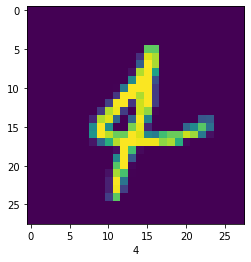

In [11]:
plot_sample(x_train, y_train , 300)

In [12]:
x_train = x_train / 255     # normalising the data
x_test = x_test / 255

In [15]:
# ANN model 

ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(1500, activation="relu"),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

ann_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann_model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2874 - accuracy: 0.9107
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0825 - accuracy: 0.9756
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0583 - accuracy: 0.9818
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0424 - accuracy: 0.9868
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0337 - accuracy: 0.9890


In [16]:
ann_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1050 - accuracy: 0.9763


[0.10497146844863892, 0.9763000011444092]

In [18]:
y_pred= ann_model.predict(x_test)
y_pred_labels =  [np.argmax(i)  for i in y_pred]

In [23]:
print(y_test[21:40])
y_pred_labels[21:40]


[6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1]


[6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1]

# **Confusion Matrix**

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    1,    1,    0,    2,    2,    1,    0,    0],
       [   0, 1110,    3,    1,    1,    2,    5,    0,   13,    0],
       [   1,    0, 1007,   17,    0,    0,    0,    4,    3,    0],
       [   1,    0,    2,  991,    0,    8,    0,    2,    4,    2],
       [   1,    1,    5,    0,  939,    0,   14,    1,    7,   14],
       [   2,    0,    0,   12,    1,  871,    3,    0,    3,    0],
       [   1,    2,    0,    1,    1,    2,  949,    0,    2,    0],
       [   2,    1,   17,    5,    1,    0,    0,  993,    5,    4],
       [   1,    0,    5,    8,    0,    4,    3,    3,  949,    1],
       [   2,    2,    0,    5,    4,    1,    2,    4,    8,  981]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

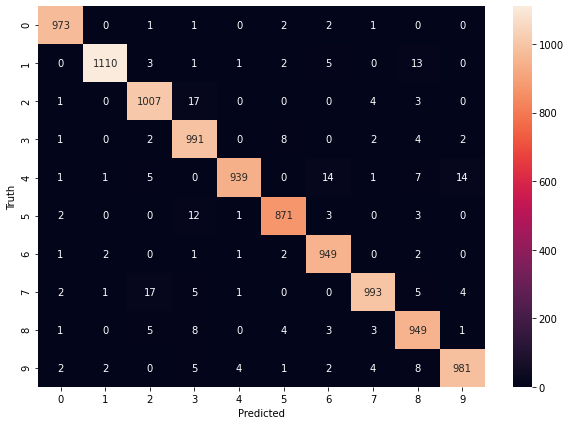

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# CNN Implementation

In [49]:
x_train= x_train.reshape(-1,28,28,1)
print(x_train.shape)
x_test= x_test.reshape(-1, 28 , 28,1)
x_test.shape

(60000, 28, 28, 1)


(10000, 28, 28, 1)

In [50]:
cnn_model = keras.Sequential([
    
    layers.Conv2D(filters= 32, kernel_size= (3,3), activation = 'relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters= 64, kernel_size= (3,3), activation = 'relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
   
    
    # fully connected layers
    
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10 , activation = 'sigmoid')
    
    
])

cnn_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [51]:
cnn_model.fit(x_train, y_train , epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 10s 2ms/step - loss: 0.2928 - accuracy: 0.9109
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0450 - accuracy: 0.9859
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0276 - accuracy: 0.9910


In [52]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0366 - accuracy: 0.9889


[0.03661106154322624, 0.9889000058174133]

In [56]:
y_pred = cnn_model.predict(x_test)
y_pred_labels =  [np.argmax(i)  for i in y_pred]
print(y_test[:10])
y_pred_labels[:10]

[7 2 1 0 4 1 4 9 5 9]


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]